# 21 Multivariate Linear Regression with Gradient Descent

### .

### Overview
<span>
    <table>
        <tr><td>The Dataset<td><tr>
        <tr><td>Machine Learning<td><tr>
        <tr><td>Training Set<td><tr>
        <tr><td>Theta Coefficients<td><tr>
        <tr><td>Cost Function<td><tr>
        <tr><td>Calculation Example<td><tr>
        <tr><td>Gradient Descent<td><tr>
        <tr><td>Feature Scaling and Mean Normalization<td><tr>
        <tr><td>Learning Rate<td><tr>
        <tr><td>Implementation Example on Predicting Brain Weight<td><tr>
        <tr><td>Evaluation of the Model<td><tr>
    <table>
<span>

### Setup

In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

## Machine Learning
Many machine learning questions focus on predicting an outcome based on a set of features. Multivariate linear regression with gradient descent is a supervised learning technique to predict continuous values. The machine learns the best fitting linear function from a training set, which it uses to predict outcomes based on feature values it has not encountered before.  

Our goal using Linear Regression with Gradient Descent is trying to minimize the cost function to get the equation that results in the best predictions. We need to fit a straight line to the data where the sum of the squared differences between the predicted and the actual values as small as possible.

## Training Set
To teach the model, we use a training set of data points. Each datapoint has a set of features (input variables) $x_1, x_2,$ ... $x_n$ that lead to an observed outcome $y$ (output variable). Features are, for instance, the age, height, weight of a baseball player. The outcome could be something like the batting average in the player's career. The data points are vectors $1$ ... $m$ as shown here:

$$
\begin{pmatrix} \underline{y_{1\ avg}} \\ x_{age} \\ x_{height} \\ x_{weight} \end{pmatrix}
\begin{pmatrix} \underline{y_2} \\ x_1 \\ x_2 \\ x_3 \end{pmatrix}
\begin{pmatrix} \underline{y_3} \\ x_1 \\ x_2 \\ x_3 \end{pmatrix}
to
\begin{pmatrix} \underline{y_m} \\ x_1 \\ x_2 \\ x_3 \end{pmatrix}
$$

## Theta Coefficients
We define a set of coefficients, called parameters or weights of the model. A coefficient $\theta$ (theta) relates to a single feature. Each theta value indicates how important the corresponding feature is, in relation to the other features, when predicting the outcome. A relative large absolute $\theta_i$ means that feature $x_i$ is a big contributor to the model in predicting the outcome. Eventually, the sum of all features times their respective $\theta$ results in the predicted outcome $h$. 

## Cost Function
The cost function $J(\Theta)$ (of all theta's combined) is a measure of how well our set of thetas does in predicting the expected outcome. The goal is to minimize $J(\Theta)$ as close as possible to zero.

$$
J(\Theta)=\frac{1}{2m}\sum_{i=1}^m\big(h_\theta(x^{(i)})-y^{(i)}\big)^2,\\
h_{\theta}(x^{(i)})=\sum_{j=0}^n\theta_jx_j^{(i)}=\Theta^Tx^{(i)}
$$


- $h_\theta(x^{(i)})$ = predicted value of $y^{(i)}$ *(h = hypothesis)*
- $x^{(i)}$ = $n$-dimensional feature vector in the training set example
- $x_j^{(i)}$ = value of feature $j$ in the vector
- $\Theta^Tx^{(i)}$ = vector multiplication of the transposed theta set with the feature set i 
- $i$ = data point index
- $m$ = number of data points
- $j$ = feature index
- $n$ = number of features
- $x$ = feature

## Calculation Example
Let's start off with a simple univariate example and say we have a learning set with only one feature $x$ and an outcome $y$. For simplicity, we set the y-intercept ($\theta_0$) to zero.

D:\1\a3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


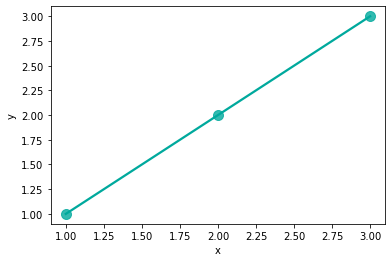

In [2]:
# Create three x, y point and fit a line
data = pd.DataFrame({'x': [1, 2, 3], 
                     'y': [1, 2, 3]})
sns.regplot("x", "y", data=data, 
           ci=None, scatter_kws={"s": 100})
plt.show()

The data points fit the line exactly. In this case, the cost function should result in $0$ because there is nu difference in the predicted $h_\theta(x^{(i)})$ and the observed values $y^{(i)}$. Calculation as follows:

$$
J(\Theta)=\frac{1}{2m}\begin{bmatrix}(1-1)^2+(2-2)^2+(3-3)^2\end{bmatrix}\\
J(\Theta)=\frac{1}{2\cdot3}(0.0)=0.0\\
$$

If the data point(s) do not fall exactly on the fitted line, we see an increase in the value of the cost function $J(\Theta)$. In the example below we lower data point $(2, 2)$ to $(2, 1.5)$ and plot the line.

D:\1\a3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\1\a3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


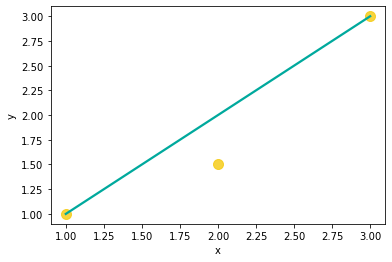

In [3]:
# Create the unchanged datapoints and fit a line
data = pd.DataFrame({'x': [1, 3], 
                     'y': [1, 3]})
sns.regplot("x", "y", data=data, 
           ci=None, scatter_kws={"s": 0})

# Lower point 2,2 to 2, 1.5
data = pd.DataFrame({'x': [1, 2, 3], 
                     'y': [1, 1.5, 3]})
sns.regplot("x", "y", data=data, fit_reg=False,
           ci=None, scatter_kws={"s": 100})
plt.show()

The data points are on and below the fitted line. In this case, the cost function should result in a value $ < 0$ because there is a difference in the predicted $h_\theta(x^{(i)})$ and the observed values $y^{(i)}$. Calculation as follows:

$$
J(\Theta)=\frac{1}{2m}\begin{bmatrix}(1-1)^2+(2-1.5)^2+(3-3)^2\end{bmatrix}\\
J(\Theta)=\frac{1}{2m}\begin{bmatrix}0+0.25+0\end{bmatrix}\\
J(\Theta)=\frac{1}{2\cdot3}(0.25)\approx0.042\\
$$

The sum of the squared differences, if we keep the fitted line through $(1, 1)$ and $(3, 3)$, is $0.25$. The cost function approximates $0.042$. Although the value is still pretty low, how can we be sure it is the best fit? Intuitively we would expect the fitted line to be somewhat lower than this. Let's try this by lowering the $y$ values with something like $0.20$.

D:\1\a3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


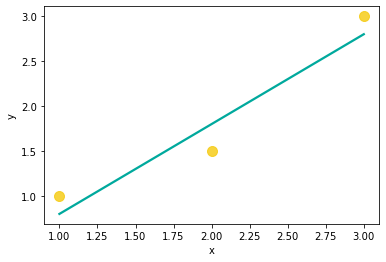

In [4]:
# Create the changed datapoints minus theta and fit a line
data = pd.DataFrame({'x': [1, 3], 
                     'y': [1 - .2, 3 - .2]})
sns.regplot("x", "y", data=data, 
           ci=None, scatter_kws={"s": 0})

# Lower point 2,2 to 2, 1.5
data = pd.DataFrame({'x': [1, 2, 3], 
                     'y': [1, 1.5, 3]})
sns.regplot("x", "y", data=data, fit_reg=False,
           ci=None, scatter_kws={"s": 100})
plt.show()

The data points are now clearly above and below the intuitively fitted line. The cost function should result in a value $ < 0$ but smaller than our previous $J(\Theta)$ value.

$$
J(\Theta)=\frac{1}{2m}[((1 - 0.2)-1)^2+((2-0.2)-1.5)^2+((3-0.2)-3)^2]\\
J(\Theta)=\frac{1}{2m}[0.04+0.09+0.04]\\
J(\Theta)=\frac{1}{2\cdot3}(0.17)\approx0.028\\
$$

This line has a better fit since the cost function value 0.028 is a lot smaller than the 0.042 from the previous $J(\Theta)$. To calculate the line of best fit in a univariate linear regression problem, we could construct a relatively simple $y=a+bx$ linear equation, where a is the y-intercept and b is the slope. When we add more features to our model, however, the number of dimensions grow along with it. This is where the Gradient Descent algorithm comes in.

## Gradient Descent
We can use the Gradient Descent algorithm to find the minimum value of the cost function $J(\Theta)$. We do this by starting at some $\theta$ values (initialize to $0$ for instance) and then iteratively updating $\theta$ with small amounts descending down until we reach convergence. That is when we hit the global minimum of the cost function.

![](http://unsupervised-learning.com/wp-content/uploads/2015/01/univariat-gradient-descent.png)

If we have more than one feature, we have a more complicated task at hand. The 3D surface plot below shows a model with two features $\theta_0$ and $\theta_1$. The colored stars show the Gradient Descent algorithm at work in finding the lowest point in the bowl. Only now it minimizes for $\theta_0$ and $\theta_1$ combined. So the height from the bottom of the plot to the surface is the value of $J(\Theta)$. By taking small steps downwards, we try to find the global minimum (for all $\theta$ values combined). We repeat until convergence.

![](http://unsupervised-learning.com/wp-content/uploads/2015/01/3d-surface-plot-gradient-descent.png)

Mathematically: we repeat (and simultaneously update for every $j$). Note: $x_0^{(i)}$ is a constant set to $1$.

$$
\theta_j:=\theta_j-\alpha\frac{\partial}{\partial\theta_j}J(\Theta),\\
\frac{\partial}{\partial\theta_j}J(\Theta)=\frac{1}{m}\sum_{i=1}^m\big(h_{\theta}(x^{(i)})-y^{(i)}\big)x_j^{(i)}
$$



## Feature Scaling and Mean Normalization
If the scales of the features differ strongly, Gradient Descent can take a long time to converge to the global minimum. To ensure that the algorithm converges as quickly as possible, it can help to scale the features within a similar range. The algorithm can find a much more direct downwards trajectory to the global minimum by using feature scaling. One way, of doing this, is dividing al feature values by the total range for that feature. This brings all features in a range from $0$ to $1$.

$$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
x_j:=\frac{x_j}{\underset{x}\argmax{f(x)}-\underset{x}\argmin{f(x)}}
$$

If we add mean normalization, we can get the ranges conveniently normalized around $0$. We do this by subtracting the value of j from the feature set mean $\mu$, which results in values roughly between $−0.5$ and $0.5$.

$$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
x_j:=\frac{x_j-\mu_x}{\underset{x}\argmax{f(x)}-\underset{x}\argmin{f(x)}}
$$

It's also possible to conduct feature scaling and mean normalization and divide by the standard deviation instead of the range.

$$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
x_j:=\frac{x_j-\mu_x}{\sigma_x}
$$

In [5]:
# Feature scaling and mean normalization example
# standardizing the y-values from the test data set
mean_y = data.y.mean()
sigma_y = data.y.std()
data['norm_y'] = data.y.apply(lambda y: (y-mean_y) / sigma_y)
data

   x    y    norm_y
0  1  1.0 -0.800641
1  2  1.5 -0.320256
2  3  3.0  1.120897

## Learning Rate
The alpha ($\alpha$) just before the partial derivative in the Gradient Descent algorithm is called the learning rate (or step size). We need to set this value within certain bounds. If this value is too large, the algorithm will overshoot and not converge to a global minimum. If the value of alpha is too small, the algorithm can take too many iteration cycles before finally converging. How to set the initial value of alpha?

One way is to take an algorithmic approach towards setting the best learning rate in combination with the number of iterations. Another [recommendation](http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex3/ex3.html) is to plot the cost function against the number of iterations to get a visual cue how well the algorithm is doing and testing different alphas at a rate of 3 times the next value $(0.01, 0.03, 0.1, 0.3$ ... $)$.

## Implementation Example on Predicting Brain Weight
For illustration purposes, we use a training set of 237 samples taken from "A Study of the Relations of the Brain to 
to the Size of the Head" - R.J. Gladstone (1905) - Source: [University of Florida](http://www.stat.ufl.edu/). The data set contains the following features: 

- gender (1=Male, 2=Female)
- agerange (1=20-46, 2=46+)
- headsize (cm3)

The observed value is the brain weight in grams. [Download](https://raw.githubusercontent.com/remondo/NoteBooks-Unsupervised-Learning/master/data/brainhead.csv) the training set from GitHub.

In [6]:
# Load the training set from csv
training_set = pd.read_csv('data/brainhead.csv')
training_set.describe()

           gender    agerange     headsize  brainweight
count  237.000000  237.000000   237.000000   237.000000
mean     1.434599    1.535865  3633.991561  1282.873418
std      0.496753    0.499768   365.261422   120.340446
min      1.000000    1.000000  2720.000000   955.000000
25%      1.000000    1.000000  3389.000000  1207.000000
50%      1.000000    2.000000  3614.000000  1280.000000
75%      2.000000    2.000000  3876.000000  1350.000000
max      2.000000    2.000000  4747.000000  1635.000000

D:\1\a3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


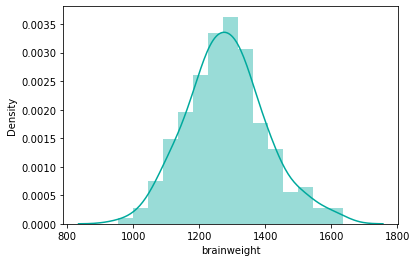

In [7]:
# Plot the distribution of brain weights
sns.distplot(training_set.brainweight)
plt.show()

In [8]:
# 1. Normalize our feature set x
features = training_set[['gender', 'agerange', 'headsize']]
observations = training_set['brainweight']
mu = features.mean()
sigma = features.std()

features_norm = (features - mu) / sigma
features_norm.head()

     gender  agerange  headsize
0 -0.874879 -1.072228  2.403781
1 -0.874879 -1.072228  0.284751
2 -0.874879 -1.072228  1.716602
3 -0.874879 -1.072228  0.391524
4 -0.874879 -1.072228  1.486630

In [9]:
# 2. Add a constant feature x0 with value 1
m = len(features_norm)  # number of data points
features_norm['x0'] = pd.Series(np.ones(m))
n = features_norm.columns.size  # number of features
features_norm.head()

     gender  agerange  headsize   x0
0 -0.874879 -1.072228  2.403781  1.0
1 -0.874879 -1.072228  0.284751  1.0
2 -0.874879 -1.072228  1.716602  1.0
3 -0.874879 -1.072228  0.391524  1.0
4 -0.874879 -1.072228  1.486630  1.0

In [10]:
# 3. Set the initial alpha and number of iterations
alpha = 0.25
iterations = 150
m = len(observations) * 1.0

# 4. Initialize the theta values to zero
thetas = np.zeros(len(features_norm.columns))
thetas

array([0., 0., 0., 0.])

In [11]:
# 5. Calculate the theta's by performing Gradient Descent
features_norm = np.array(features_norm)
observations = np.array(observations)

cost_history = []

for i in range(iterations):
    # Calculate the predicted values
    predicted = np.dot(features_norm, thetas)

    # Calculate the theta's for this iteration:
    thetas -= (alpha / m) * np.dot((predicted - observations), features_norm)
    
    # Calculate cost
    sum_of_square_errors = np.square(predicted - observations).sum()
    cost = sum_of_square_errors / (2 * m)

    # Append cost to history
    cost_history.append(cost)
    
thetas

array([ -11.19843822,  -11.97865076,   89.20113027, 1282.87341772])

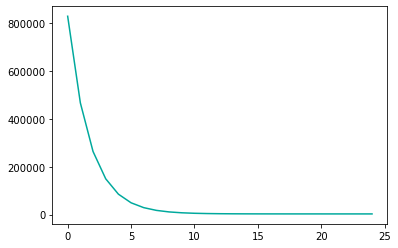

In [12]:
# Plot the last 25 entries of the cost history  
plt.plot(cost_history[:25])
plt.show()

In [13]:
# Calculate the predicted brainweights and differences from the observed values
training_set['predictions'] = np.dot(features_norm, thetas)
training_set['difference'] = training_set['predictions'] - training_set['brainweight']
training_set.head()

   gender  agerange  headsize  brainweight  predictions  difference
0       1         1      4512         1530  1519.934523  -10.065477
1       1         1      3738         1297  1330.914631   33.914631
2       1         1      4261         1335  1458.637375  123.637375
3       1         1      3777         1282  1340.438889   58.438889
4       1         1      4177         1590  1438.123588 -151.876412

D:\1\a3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\1\a3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


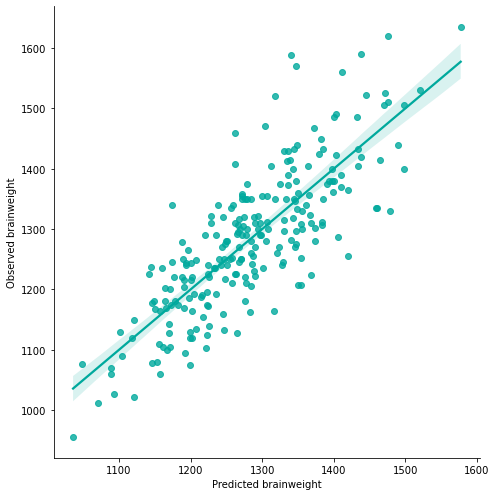

In [14]:
# Plot the predicted against the observed values
p = sns.lmplot("predictions", "brainweight", data=training_set, size=7)
p.set_axis_labels("Predicted brainweight", "Observed brainweight")
plt.show()

D:\1\a3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


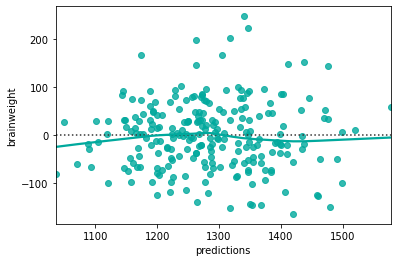

In [15]:
# Plot the residuals
p = sns.residplot(training_set.predictions, training_set.brainweight, lowess=True)
plt.show()

## Evaluation of the Model
To evaluate how good the model is in predicting the output values, we can use the coefficient of determination ($r^2$). The value range is from $0$ to $1$. The higher the $r^2$ coefficient the better the model. We can calculate this value by using the following formula:

$$r^2=\frac{\sum_n(y_i-p_i)^2}{\sum_n(y_i-\bar{x})^2}$$

In [16]:
# Calculate the coefficient of determination (r^2)
y = np.array(training_set.brainweight)
p = np.array(training_set.predictions)
xbar = np.mean(y)

r_squared = 1 - np.square(y - p).sum() / np.square(y - xbar).sum()
r_squared

0.6528346387526655

### Done!

#### Next: _One-Way ANOVA - Analysis of Variance_